M17 test with PMOIRED

In [2]:
%pylab notebook
import time, os, pickle
try:
    # -- global installation
    import pmoired
    print('global')
except:
    # -- local installation
    import sys
    sys.path = ['../pmoired'] + sys.path
    import __init__ as pmoired
    print('local')
import dpfit, oifits, oimodels, tellcorr

Populating the interactive namespace from numpy and matplotlib


[P]arametric [M]odeling of [O]ptical [I]nte[r]ferom[e]tric [D]ata https://github.com/amerand/PMOIRED
local


## List and load data
OIFITS files can contain data from different targets and instruments. The constructor for `OI` can be set to load data from a specific instrument / target by using keyword arguments `insname` and `targname`. If the file contain more than one target and no `targname` is specified, then the loading will fail. On the other hand, if a single target is present but many instruments, all instruments will be loaded in separate dictionnaries.

For this particular case, we do not really use the spectral resoution, but still require some chromatique information. This is a good case to use the `binning` option when loading data, which will optimally bin data (based on their error). `binning=5` means that spectral information will be reduced by a factor of 5.

In [3]:
from importlib import reload
reload(pmoired)

dir = "/Users/ebordier/GRAVITY/M17/"

#Binary stars : files 
# file = 'SCI_TYC6265-1977-1_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_SINGLE_SCI_VIS_CALIBRATED.fits'
# file = 'SCI_NGC6618-B98_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_no_SINGLE_SCI_VIS_CALIBRATED_1.fits'
# file = 'SCI_NGC6618-B111_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_n_SINGLE_SCI_VIS_CALIBRATED_1.fits'
# file = 'SCI_NGC6618-B189NE_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_SINGLE_SCI_VIS_CALIBRATED_1.fits'
# file = 'SCI_NGC6618-B293_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_n_SINGLE_SCI_VIS_CALIBRATED.fits'

#Triple or higher order systems : files
# file = 'SCI_NGC6618-B189SW_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_SINGLE_SCI_VIS_CALIBRATED.fits'
# file = 'SCI_NGC6618-B0_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_noF_SINGLE_SCI_VIS_CALIBRATED.fits'
# file = 'SCI_NGC6618-B260_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_n_SINGLE_SCI_VIS_CALIBRATED_1.fits'

#data = oifits.loadOI(dir+file, insname='GRAVITY_SC')

directory = dir+"B189SW/"
files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('SINGLE_SCI_VIS_CALIBRATED_1.fits')]# or f.endswith('SINGLE_SCI_VIS_CALIBRATED_1.fits')]
# -- load only spectrograph
oi = pmoired.OI(files, insname='GRAVITY_SC')#,binning=5)
#oi.show(obs=['|V|','T3PHI'],spectro=False)
# data=[oifits.loadOI(os.path.join(directory, f)) for f in files]

[P]arametric [M]odeling of [O]ptical [I]nte[r]ferom[e]tric [D]ata https://github.com/amerand/PMOIRED
loadOI: loading /Users/ebordier/GRAVITY/M17/B189SW/SCI_NGC6618-B189SW_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_SINGLE_SCI_VIS_CALIBRATED_1.fits
  > insname: "GRAVITY_SC" targname: "NGC6618_B189SW" pipeline: "GRAVITY Instrument Pipeline 1.2.4"
  > MJD: (20,) [ 58295.30470541666 .. 58295.30470541666 ]
  > U1-U2-U3-U4 | WL: (210,) [ 1.99 .. 2.45 ] um (R~504) {'OI_FLUX': 4, 'OI_T3': 4, 'OI_VIS': 6, 'OI_VIS2': 6} | | TELLURICS: False


## Fit a multi-components model 
The model is composed of two components: a "compact" component and a "resolved" one. Making a composite model is very easy to achieve: the model is still described by a dictionnary, but parameters are grouped by components as `component,param`.

The compat component is used as the phase and flux reference: it has central position `x, y = 0, 0` (because by default, if no position is give, it will be placed at '0,0'). We have to fix the flux somehow, since interferometry if not sensitive to absolute fluxes. This is achieved by adding `compact,f0` to `doNotFit`. 

When we look at the result with the `show` method, we can display all data (`allInOne=True`) with the model as function of the wavelength (i.e. `spectro=True`, set automatically). A synthetic image is computed when a field-of-view `imFov` and pixel size `imPix` are given (both in mas). In this particular case, the extended component has very low surface brightness. To make is visible in the synthetic image, the image is shown only between 0 and `imMax=0.002`.

In [4]:
reload(pmoired)

[P]arametric [M]odeling of [O]ptical [I]nte[r]ferom[e]tric [D]ata https://github.com/amerand/PMOIRED


<module '__init__' from '../pmoired/__init__.py'>

[dpfit] 12 FITTED parameters: ['2,f', '2,fwhm', '2,incl', '2,projang', '2,sx', '2,x', '2,y', 'c,f', 'c,sx', 'c,ud', 'c,x', 'c,y']
[dpfit] using scipy.optimize.leastsq
[dpfit] Tue Oct 18 15:38:56 2022 001/000 CHI2: 4.0106e+02|
[dpfit] Both actual and predicted relative reductions in the sum of squares  are at most 0.000010
[dpfit] number of function call: 458
[dpfit] time per function call: 3.563 (ms)
# --     CHI2= 11661.50213982213
# -- red CHI2= 6.464247305888099
# --     NDOF= 1804
{'2,f':       0.16459, # +/- 0.00089
'2,fwhm':    4.746, # +/- 0.055
'2,incl':    75.30, # +/- 0.38
'2,projang': -43.72, # +/- 0.42
'2,sx':      -5.47, # +/- 0.22
'2,x':       -70.518, # +/- 0.015
'2,y':       -14.443, # +/- 0.015
'c,f':       0.02925, # +/- 0.00061
'c,sx':      1.22, # +/- 0.65
'c,ud':      -0.000000001, # +/- 0.000000060
'c,x':       -2.666, # +/- 0.026
'c,y':       -3.669, # +/- 0.036
'1,f':       1,
'1,ud':      0.2,
'1,x':       0.0,
'1,y':       0.0,
'2,spectrum':'$2,f*($WL/2.2)**$2

<IPython.core.display.Javascript object>


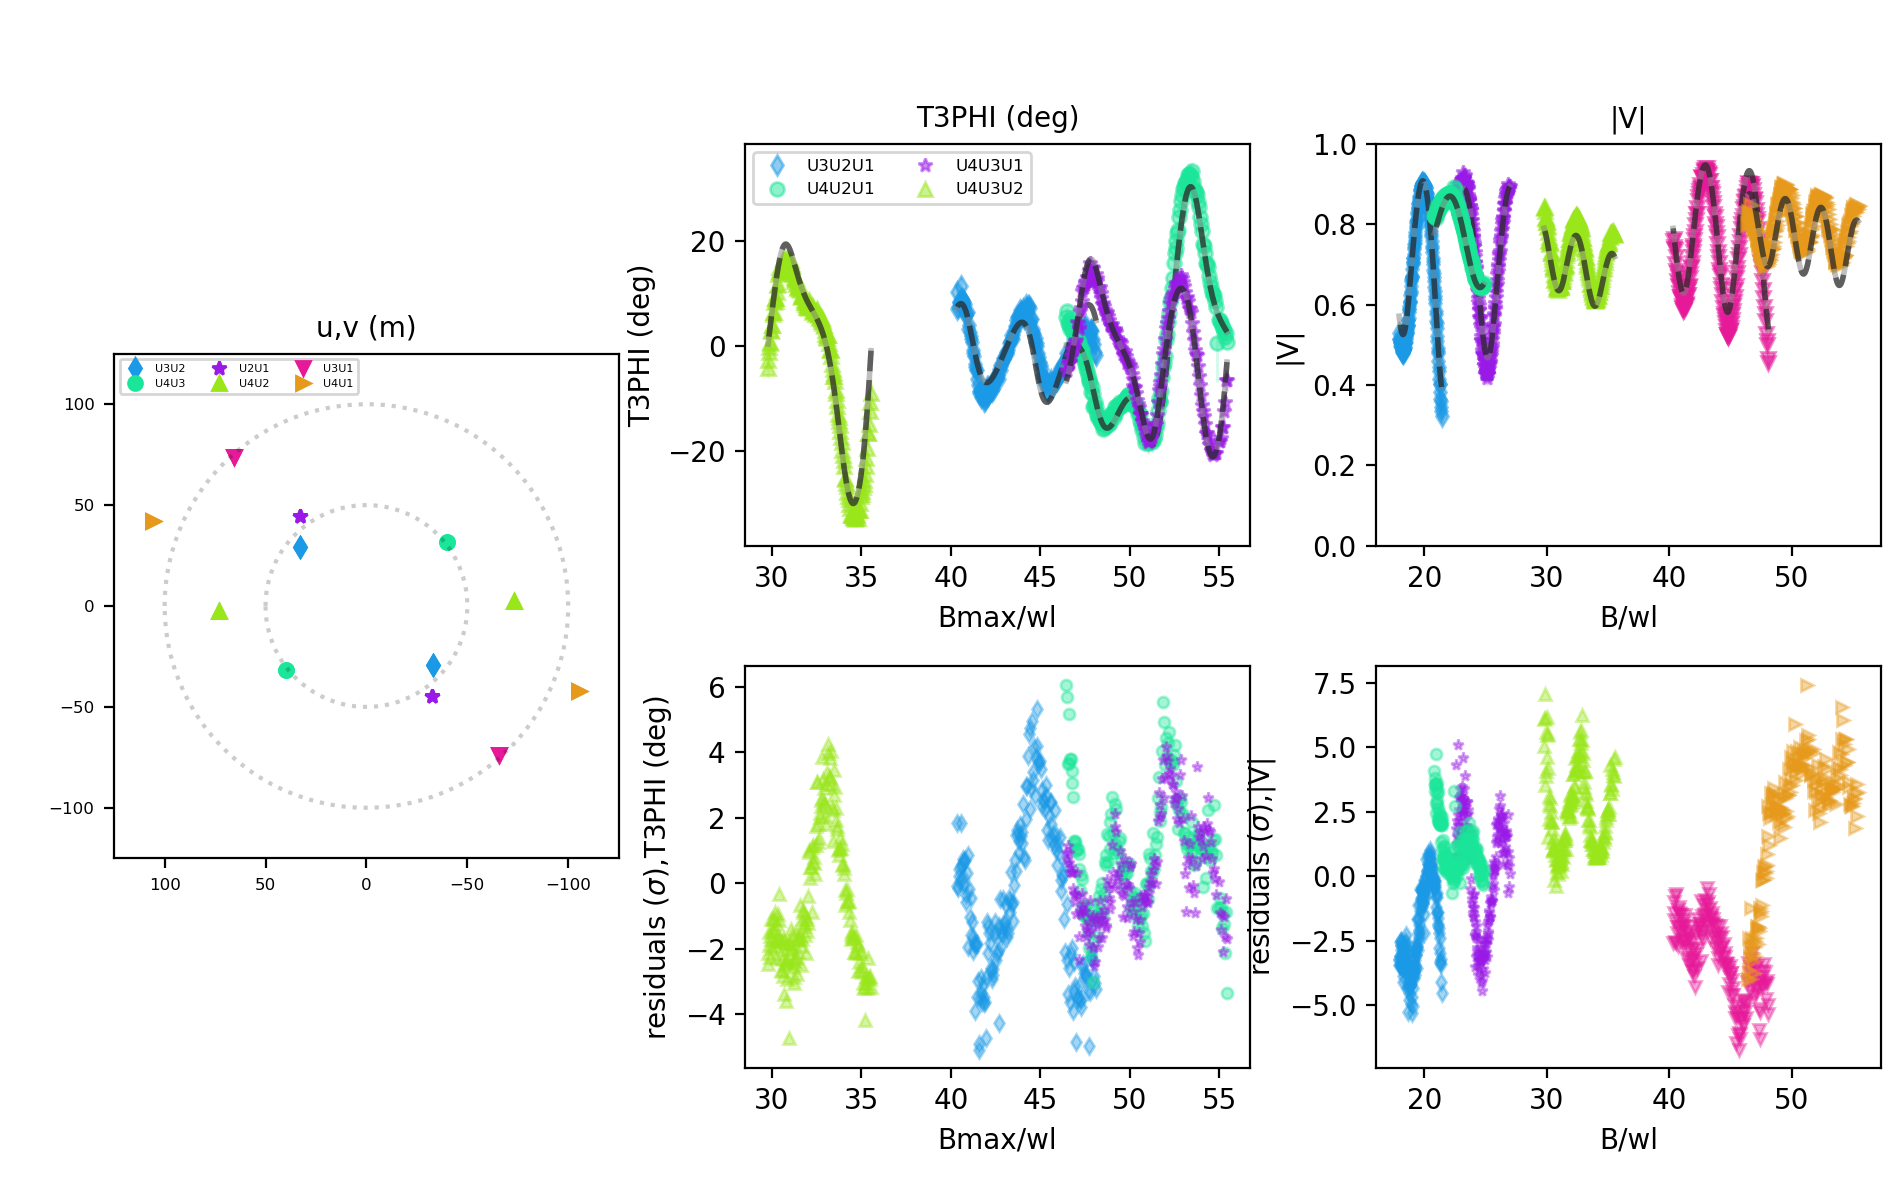

I DO THAT HEHEHE
3 1
3 2


<IPython.core.display.Javascript object>


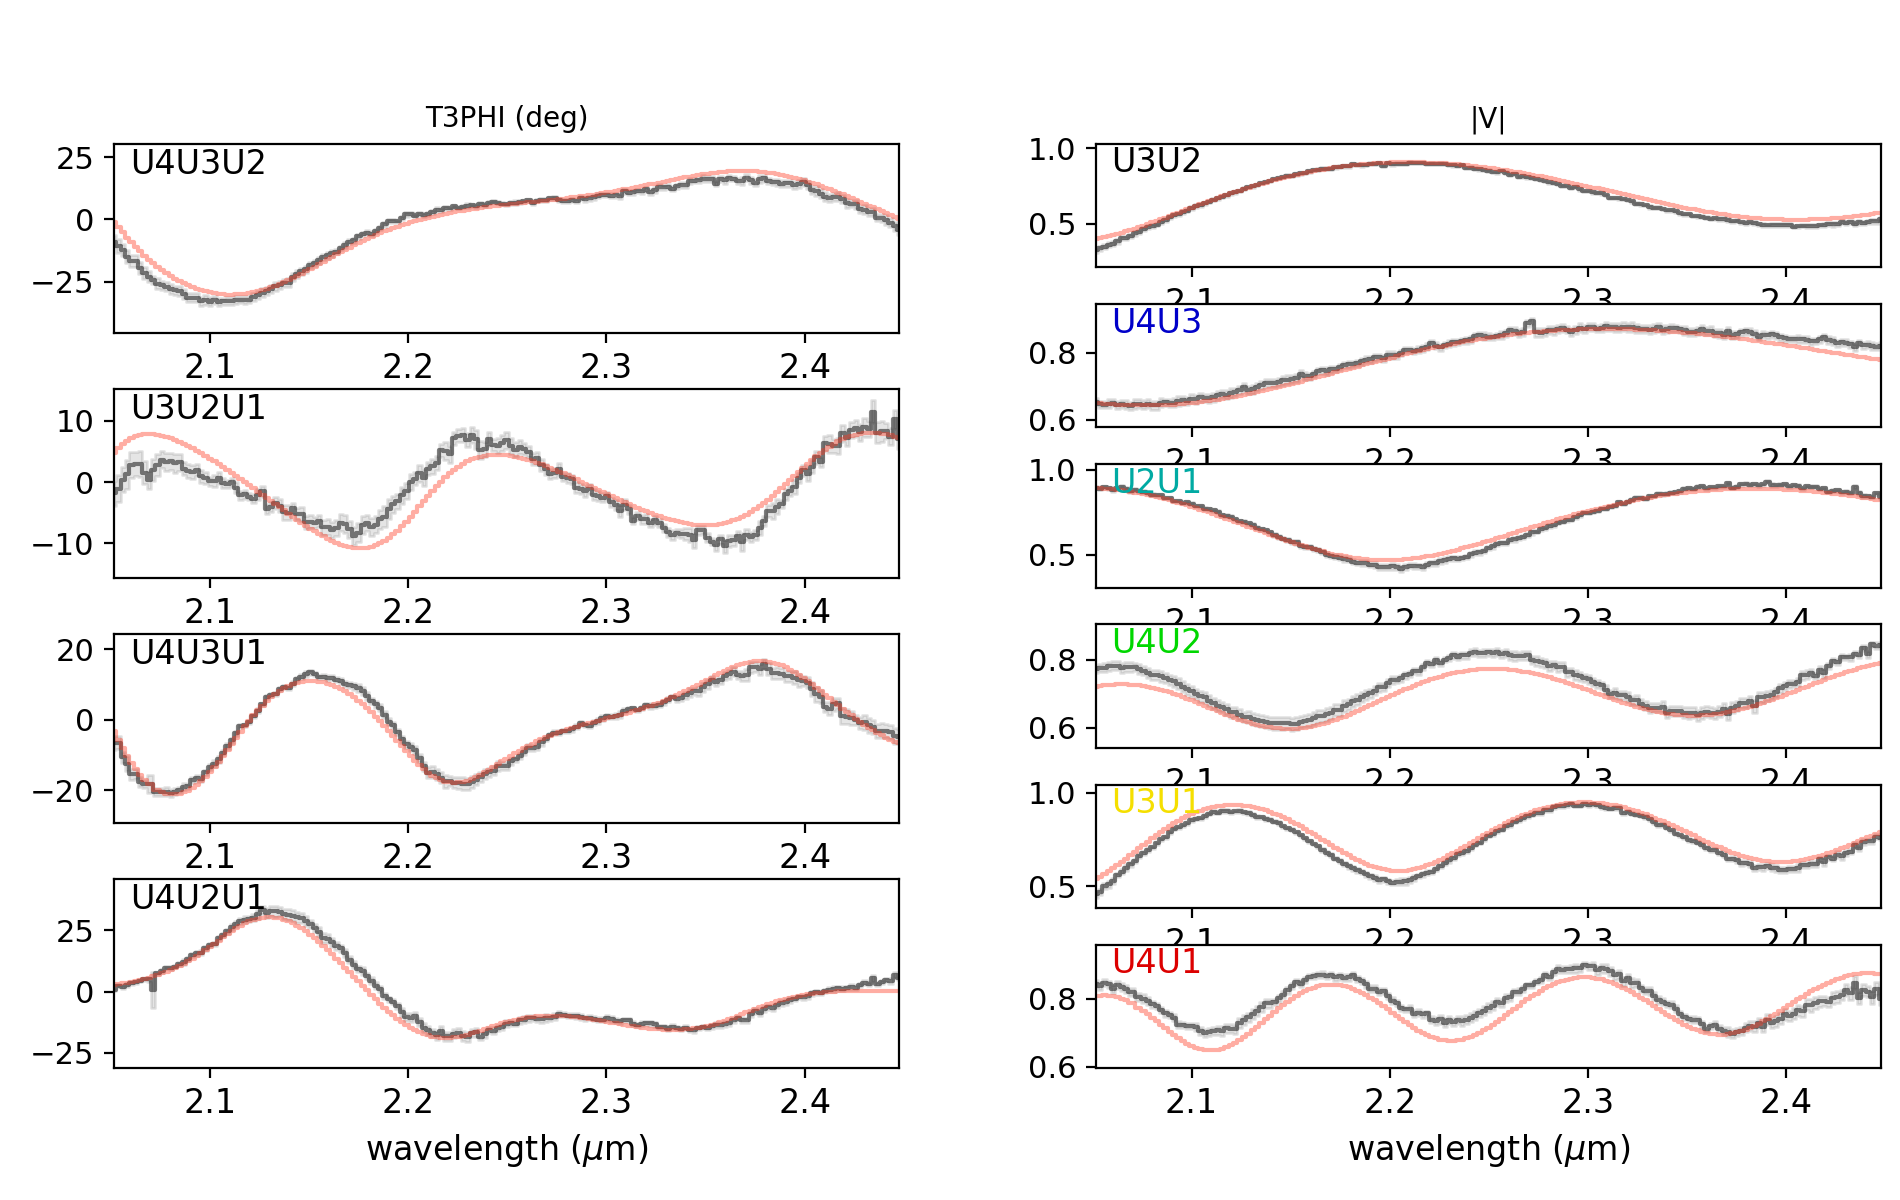

<IPython.core.display.Javascript object>


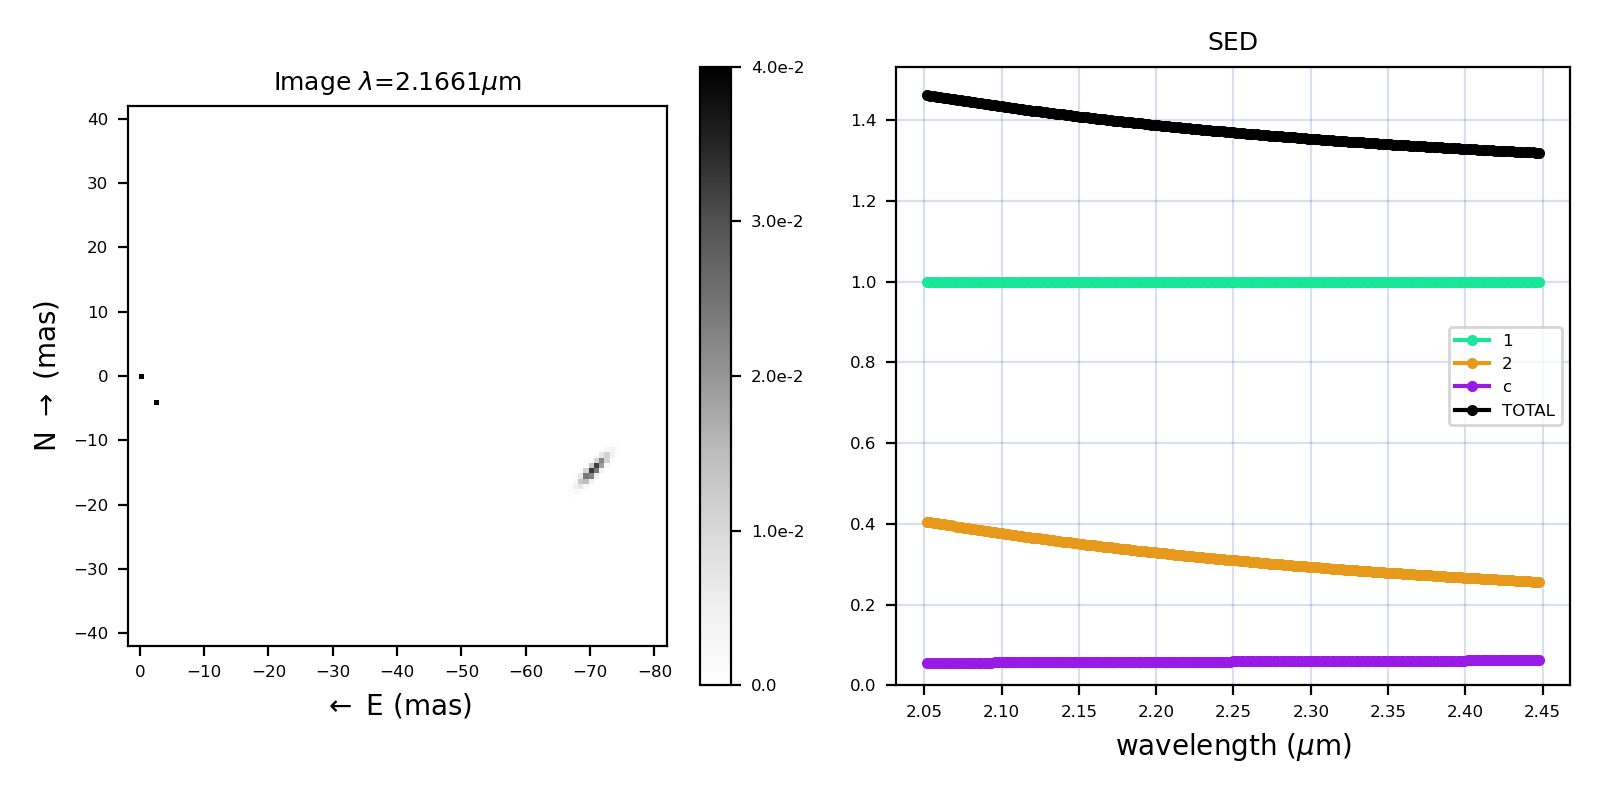

In [7]:

reload(oimodels)

# -- set the context for the fit
fit = {
    'obs': ['|V|','T3PHI'],#'NFLUX'],#'NFLUX'],
#     wavelength range: (bluest part is very noisy)
#     'wl ranges':[(np.min(oi.data[0]['WL']),np.max(oi.data[0]['WL']))],
    'wl ranges':[(2.05, 2.45)],
#      'wl ranges':[(2.15,2.19)],    #Centered on BrGamma
    'min error': {'T3PHI':0.5},
    'min relative error':{'|V|':0.01}
}

#data['fit'] = fit
oi.setupFit(fit)

# first guesses for a binary
# param = 

# {'compact,f0':   1.0, # flux of compact component
#         'compact,ud':   .5, # uniform disk diameter (mas)
#          'compact,x':0, 'compact,y':0
#         }
param = {
'1,f': 1.0,'1,ud': 0.2 , '1,x': 0.0,'1,y': 0.0,
#          '2,f': 0.31,'2,ud': 0.2,'2,x': 0.95, '2,y':0.35}
#     '3,f':0.1}
#          '3,f': 0.05, '3,ud': 0.2,'3,x': -11, '3,y':18,
# # # # #     '4,f': 0.09, '4,ud': 0.2,'4,x': -9.1, '4,y':20,
#         '4,f':0.09}
#          'disk1,f':  0.09, # +/- 0.0020
# #         'disk1,incl':5,
# #     'disk1,projang':170,
#         'disk1,fwhm': 5, # +/- 0.21
# # # # # # # #          'disk,fwhm':0.3,
# # #         'disk1,x': -0.5,
# # #         'disk1,y':  9.4,
# # #         'disk2,f':  0.15,
#         'disk1,ud': 5,
#         'disk1,x':  0,
#         'disk1,y':  0
    
    
#         'disk1,slant':0.5,
#         'disk1,slant projang':0
#                 'resolved,f':   0.15,  # resolved component flux
# #           'resolved,F2':   0.2, # resolved component flux in (lambda-min(lambda))**2
# #           'resolved,spectrum': '$F0 + $F2*($WL-2.0)**2',
# # # #           'resolved,fwhm': 17.0,  # resolved component has a gaussian profile, this is its full width half maximum (mas)
#           'resolved,x':    1.27, # offset to E (mas)
#           'resolved,y':    0.06, # offset to N (mas) 
# # #          'resolved,spectrum': '$F0 + $F2*($WL-2.0)**2',
#           'resolved,slant':    0.5, 
#           'resolved,slant projang': 10, 
#           'resolved,ud':       19
#ELLIPSOID GAUSSIAN
#          'disk,f':0.05,
#          'disk,x':10,
#          'disk,y':-2,
# #          'resolved,elong_ratio':1.5,
# #          'disk,udout':10, #ring
# #          'disk,thick':1, #ring
#          'disk,incl':18,
#          'disk,projang':180,
#          'disk,slant':0.2,
#          'disk,slant projang': 10,
#         'disk, ud':19
         
# Single,unresolved
#          'compact,f0':1,
#          'compact,ud':0.5}
#         'compact,x':0,
#         'compact,y':0}
         
        
        
#          '3,f':0.01}
# '1,line_1_f': -1, '1,line_1_lorentzian': 0.2, '1,line_1_wl0': 2.167
 
# #B189SW
'2,fwhm':    3.97, # +/- 0.10
'2,incl':    77.7, # +/- 0.93
'2,projang': -41.32, # +/- 0.96
'2,f':      0.44, # +/- 0.0056
'2,sx':      -2.46, # +/- 0.25
'2,x':       -70.421, # +/- 0.031
'2,y':       -14.80, # +/- 0.033
'c,f':      0.0765, # +/- 0.0032
'c,sx':      -2.54, # +/- 0.70
'c,x':       -2.553, # +/- 0.073
'c,y':       -3.57, # +/- 0.11
'1,f':       1,
'1,ud':      0.2,
'2,spectrum':'$2,f*($WL/2.2)**$2,sx',
'c,spectrum':'$c,f*($WL/2.2)**$c,sx',
'c,ud':      0.2}

# }

# param = {'1,f': 1.0,'1,ud': 0.2 , '1,x': 0.0,'1,y': 0.0,
#          '2,f': 0.3,'2,ud': 0.2,'2,x': -46, '2,y':-41,
#          '3,f': 0.1,'3,ud': 0.2,'3,x': 31, '3,y':43,
#          '4,f':0.01,        
#          '1,line_1_f': -1, '1,line_1_lorentzian': 0.2, '1,line_1_wl0': 2.167}

# param = {'compact,f0':   1.0, # flux of compact component
#          'compact,ud':   .5, # uniform disk diameter (mas)
#          'resolved,F0':   0.05,  # resolved component flux
#          'resolved,F2':   0.5, # resolved component flux in (lambda-min(lambda))**2
#          'resolved,spectrum': '$F0 + $F2*($WL-2.0)**2',
#          'resolved,fwhm': 5.0,  # resolved component has a gaussian profile, this is its full width half maximum (mas)
#          'resolved,x':    0, # offset to E (mas)
#          'resolved,y':    0, # offset to N (mas)
#         }

# doNotFit = ['compact,f0']
doNotFit=['1,f','1,x','1,y','1,ud','2,ud']#,'c,ud']#,'3,ud']#,'4,ud']#''c,ud',','3,ud']#,'disk1,x','disk1,y']#,'disk1,y']#,'3,ud']#,'disk1,ud']#'disk1,x','disk1,y']#,'disk1,x','disk1,y']#,'3,x','3,y']#,'3,ud']
f=oi.doFit(param, doNotFit=doNotFit)
# # -- using 'merged' because computations are faster:
# oi.doFit(param, doNotFit=doNotFit)
# -- using 'data' will show each file separatly
#oi.show(model=None,spectro=False)
oi.show(allInOne=1,spectro=False)
oi.show(allInOne=True, imFov=83, imPix=0.8,imMax=0.04,imWl0=2.166,showUV=False,imPow=1.,imX=-40,cmap='Greys') #, imMax=0.002 #imWl0=2.2 imX=-40
#oi.showFit()

In [313]:
NDOF=len(oi.bestfit['model'])-len(oi.bestfit['prior'])-len(oi.bestfit['fitOnly'])+1
print("Our computed NDOF:",NDOF)
print("PMOIRED's NDOF: ", oi.bestfit['ndof']," WITH", len(oi.bestfit['prior']), "PRIORS")

Our computed NDOF: 1811
PMOIRED's NDOF:  1812  WITH 1 PRIORS


In [194]:
wvl=oi.spectra['flux WL']
flux2=oi.spectra['flux COMP']['c']

In [196]:
wvl2=oi.spectra['flux WL']
flux2_2=oi.spectra['flux COMP']['c']

In [5]:
oi.bootstrapFit(Nfits=100)

Tue Feb 22 12:57:51 2022: running 100 fits on 8 processes
  one fit takes ~0.63s [~94.9 fit/minutes]
Tue Feb 22 12:57:56 2022: approx 58.1s remaining
Tue Feb 22 12:58:03 2022: it took 12.2s, 0.12s per fit on average [493.0 fit/minutes]
using 100 fits out of 100 (sigma clipping 4.50)
{'compact,f0':1 ,
'compact,ud': 0.00000000000000000008, # +/- 0.00000000000000000037
}
Correlations (%)  >=90 >=80 >=70 >=50 >=20 <20%
               0  
 0:compact,ud ###   6 


In [11]:
# -- grid search
expl = {'grid':{'2,x': (-30, 30, 8), '2,y':(-30, 30, 8)}}
oi.gridFit(expl,model=param, doNotFit=['1,f','1,x','1,y','1,ud','2,ud','3,ud'])#,'4,ud'])

Fri Sep 23 16:33:49 2022: running 64 fits on 8 processes
  one fit takes ~1.55s [~38.7 fit/minute]
Fri Sep 23 16:34:01 2022: approx 1.4min remaining
Fri Sep 23 16:34:26 2022: it took 37.0s, 0.58s per fit on average [103.7 fit/minutes]
fit converged: 64 / 64
unique minima: 64 / 64
------------
best fit: chi2= 21.625306978657566
{'2,f': 0.1617, # +/- 0.0048
'2,x': -4.881, # +/- 0.019
'2,y': 5.120, # +/- 0.028
'1,f': 1.0,
'1,ud':0.2,
'1,x': 0.0,
'1,y': 0.0,
'2,ud':0.2,
}

Correlations (%)  >=90 >=80 >=70 >=50 >=20 <20%
        0   1   2  
 0:2,f ### -64 -26 
 1:2,x -64 ### -46 
 2:2,y -26 -46 ### 


<IPython.core.display.Javascript object>


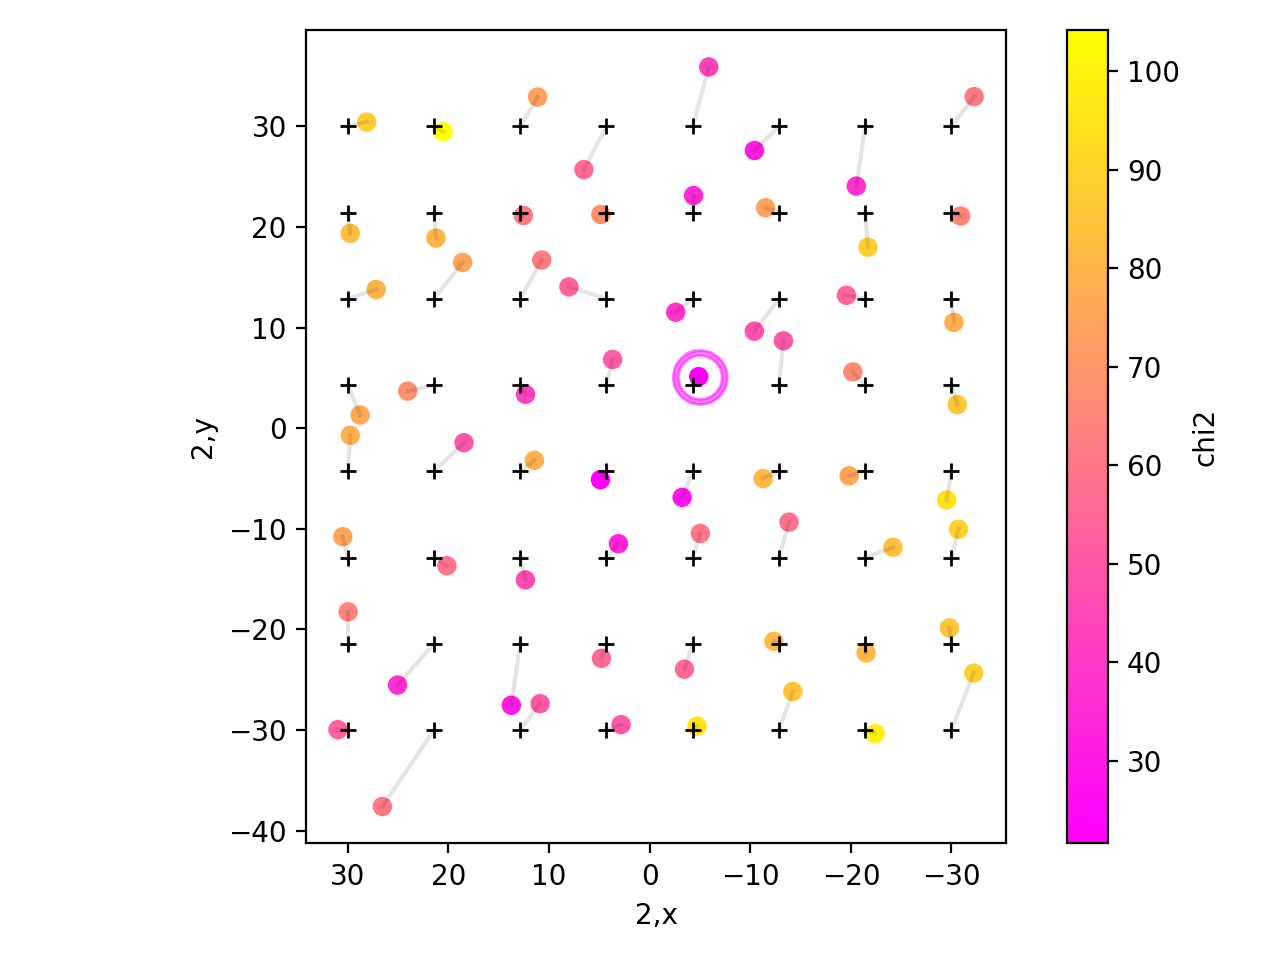

In [12]:
oi.showGrid()

In [190]:
m = oimodels.VmodelOI(oi.data, param, imFov=90, imPix=0.5,imX=-40,
                    debug=False)

In [192]:
flux_comp_1=

#print(m[0]['MODEL'].keys())
print(oi.spectra.keys())
print(oi.spectra['flux COMP']['1'])

dict_keys(['model', 'flux WL', 'flux COMP', 'err flux COMP', 'flux TOTAL', 'normalised spectrum WL', 'normalised spectrum COMP', 'normalised spectrum TOTAL'])
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [177]:
file_calib = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('SINGLE_CAL_TF.fits')]
oi_calib = pmoired.OI(file_calib, insname='GRAVITY_SC')
# mean_flux_over_4_tel_calib=np.mean([oi_calib.data[0]['OI_FLUX'][k]['FLUX'] for k in oi_calib.data[0]['OI_FLUX']], axis=0)

loadOI: loading /Users/ebordier/GRAVITY/M17/B189SW/CAL_HD167334_GRAVITY_UT1UT2UT3UT4_MEDIUM-COMBINED_noFT_SINGLE_CAL_TF.fits
  > insname: "GRAVITY_SC" targname: "HD_167334" pipeline: "GRAVITY Instrument Pipeline 1.2.4"
  > MJD: (20,) [ 58295.318460763876 .. 58295.318460763876 ]
  > U1-U2-U3-U4 | WL: (210,) [ 1.99 .. 2.45 ] um (R~504) {'OI_FLUX': 4, 'OI_T3': 4, 'OI_VIS': 6, 'OI_VIS2': 6} | | TELLURICS: True


In [178]:
# reload(tellcorr)
# wvl,flux_data=tellcorr.gravity(files[0],quiet=False) #flux=sum of the 4 telescopes diff from the average flux of the 4telescopes
# wvl_calib,flux_calib=tellcorr.gravity(file_calib[0],quiet=False)

In [179]:
mean_flux_over_4_tel=np.mean([oi.data[0]['OI_FLUX'][k]['FLUX'] for k in oi.data[0]['OI_FLUX']], axis=0)[0]#obs av tot flux
mean_flux_over_4_tel_calib=np.mean([oi_calib.data[0]['OI_FLUX'][k]['FLUX'] for k in oi_calib.data[0]['OI_FLUX']], axis=0)[0]

fluxerrSCI=0.10*mean_flux_over_4_tel

calib_spectra_over_4_tel=mean_flux_over_4_tel/mean_flux_over_4_tel_calib


In [180]:
import sys
sys.path.insert(0, '/Users/ebordier/Gravity/Scripts/Binaries/ExtractBinSpec')
import readGravity as rg
import JKmodRingFunctions as mrf


file_template="/Users/ebordier/GRAVITY/Calibrations/K0III_HD100006.fits"
fluxTEMP, waveTEMP = rg.readIRTFTemplate(file_template)

#rebin
fluxTEMP = rg.rebin_spec(waveTEMP, fluxTEMP, oi.spectra['flux WL'])
fluxTEMP = rg.NormalizeFlux(fluxTEMP*1e16, calib_spectra_over_4_tel, fluxerrSCI)

FLUX=calib_spectra_over_4_tel*fluxTEMP

#flux_final=Average_flux_primary*fluxTEMP


<IPython.core.display.Javascript object>


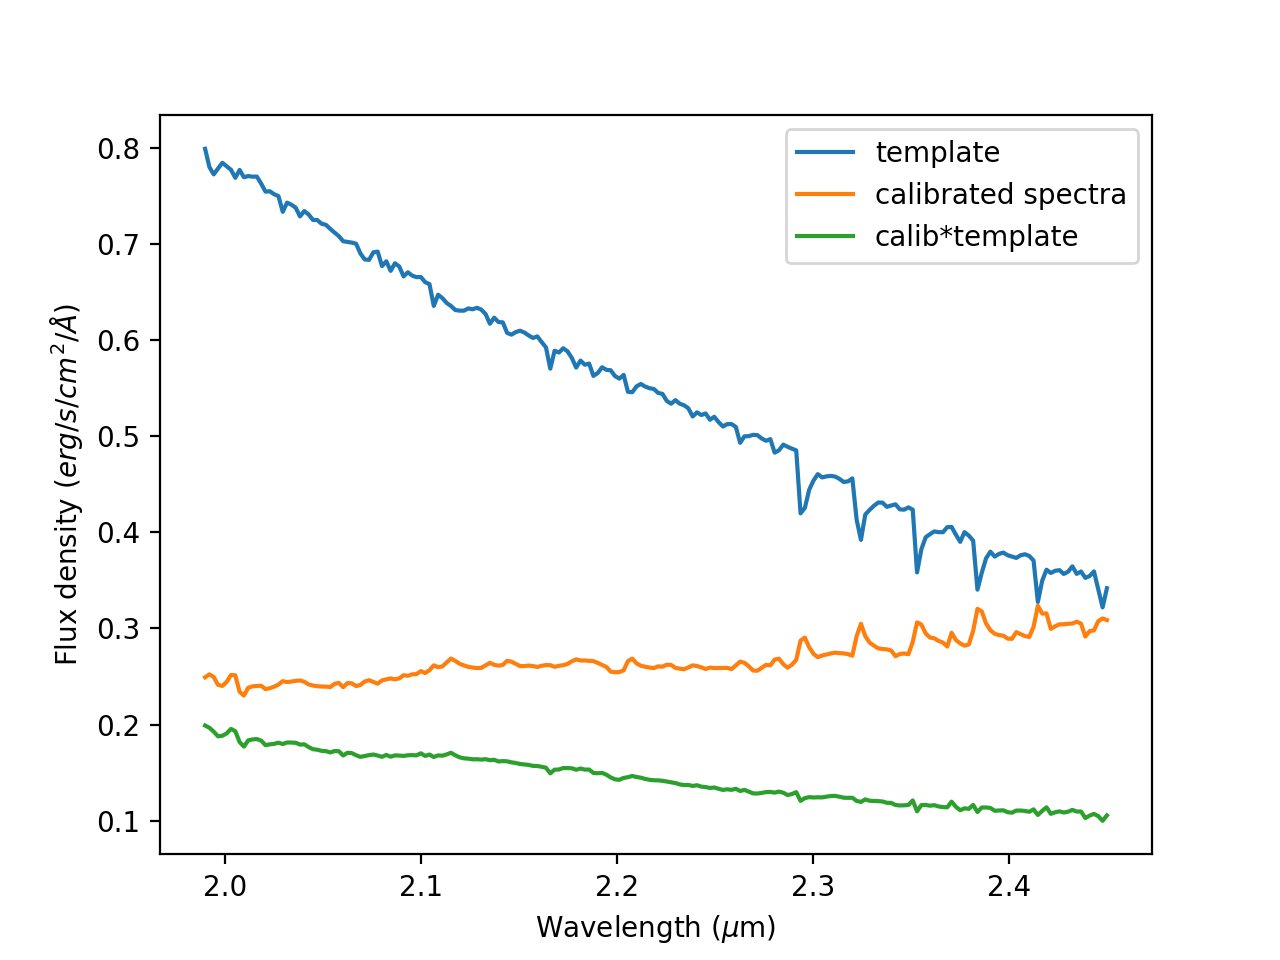

Text(0, 0.5, 'Flux density ($erg/s/cm^{2}/\\AA$)')

In [181]:
plt.figure()
#plt.plot(oi.spectra['flux WL'], Average_flux_primary, label="primary")
#plt.plot(wvl, Average_flux_primary_2, label="observed av tellcorr flux primary")
#plt.plot(oi.spectra['flux WL'], Average_flux_companion, label="comp")
#plt.plot(wvl,mean_flux_over_4_tel,label='sci')
#plt.plot(wvl,calib_spectra,label='sci/calib')
plt.plot(oi.spectra['flux WL'],fluxTEMP,label='template')
plt.plot(oi.spectra['flux WL'],calib_spectra_over_4_tel,label='calibrated spectra')
plt.plot(oi.spectra['flux WL'],FLUX,label='calib*template')


plt.legend()
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel(r'Flux density ($erg/s/cm^{2}/\AA$)')

In [214]:
#index of 2MASS K-band 2.19um
x=2.19
wvl=oi.spectra['flux WL']
difference_array = np.absolute(wvl-x)
index_K_band = difference_array.argmin()

print("Nearest element to the given values is : ", wvl[index_K_band])
print("Index of nearest value is : ", index_K_band)

#conversion from counts to 2MASS photometry 
FLUX=(2.08e-9*FLUX)/FLUX[index_K_band]*1e-4 #um to Ansgtrom 

#observed spectra for primary comp
flux_primary=oi.spectra['flux COMP']['1']
total_flux=oi.spectra['flux TOTAL']
FLUX_primary=FLUX*flux_primary/total_flux

#observed spectra for closest comp
flux_comp2=oi.spectra['flux COMP']['c']#compact, without disk

FLUX_companion=FLUX*flux_comp2/total_flux
print(FLUX_companion)

Nearest element to the given values is :  2.1902869775658473
Index of nearest value is :  91
[1.51697182e-14 1.49949689e-14 1.46828607e-14 1.43146994e-14
 1.43596740e-14 1.45417589e-14 1.49012361e-14 1.47226033e-14
 1.38610228e-14 1.34980684e-14 1.39952712e-14 1.40670323e-14
 1.40956964e-14 1.39722531e-14 1.36159227e-14 1.36793349e-14
 1.37157004e-14 1.38070729e-14 1.37022686e-14 1.38271830e-14
 1.38193913e-14 1.38005207e-14 1.36564723e-14 1.36814443e-14
 1.34609546e-14 1.32927187e-14 1.32518342e-14 1.31623420e-14
 1.31405967e-14 1.30354415e-14 1.31461580e-14 1.31333075e-14
 1.27935625e-14 1.30110317e-14 1.29820667e-14 1.28115236e-14
 1.26855169e-14 1.27558431e-14 1.28200456e-14 1.28715165e-14
 1.27898297e-14 1.26887127e-14 1.28391706e-14 1.26987481e-14
 1.28011443e-14 1.27879640e-14 1.27592007e-14 1.28134030e-14
 1.28233883e-14 1.28044851e-14 1.29675420e-14 1.27608122e-14
 1.28670043e-14 1.26713285e-14 1.28048285e-14 1.27771502e-14
 1.28807362e-14 1.30096867e-14 1.28046242e-14 1.26483

In [201]:
FLUX_companion=FLUX*flux2/total_flux
FLUX_companion2=FLUX*flux2_2/total_flux

#print(FLUX_companion2)

[1.51697182e-14 1.49949689e-14 1.46828607e-14 1.43146994e-14
 1.43596740e-14 1.45417589e-14 1.49012361e-14 1.47226033e-14
 1.38610228e-14 1.34980684e-14 1.39952712e-14 1.40670323e-14
 1.40956964e-14 1.39722531e-14 1.36159227e-14 1.36793349e-14
 1.37157004e-14 1.38070729e-14 1.37022686e-14 1.38271830e-14
 1.38193913e-14 1.38005207e-14 1.36564723e-14 1.36814443e-14
 1.34609546e-14 1.32927187e-14 1.32518342e-14 1.31623420e-14
 1.31405967e-14 1.30354415e-14 1.31461580e-14 1.31333075e-14
 1.27935625e-14 1.30110317e-14 1.29820667e-14 1.28115236e-14
 1.26855169e-14 1.27558431e-14 1.28200456e-14 1.28715165e-14
 1.27898297e-14 1.26887127e-14 1.28391706e-14 1.26987481e-14
 1.28011443e-14 1.27879640e-14 1.27592007e-14 1.28134030e-14
 1.28233883e-14 1.28044851e-14 1.29675420e-14 1.27608122e-14
 1.28670043e-14 1.26713285e-14 1.28048285e-14 1.27771502e-14
 1.28807362e-14 1.30096867e-14 1.28046242e-14 1.26483285e-14
 1.25683362e-14 1.25427342e-14 1.24887902e-14 1.24971896e-14
 1.24654628e-14 1.250090

<IPython.core.display.Javascript object>


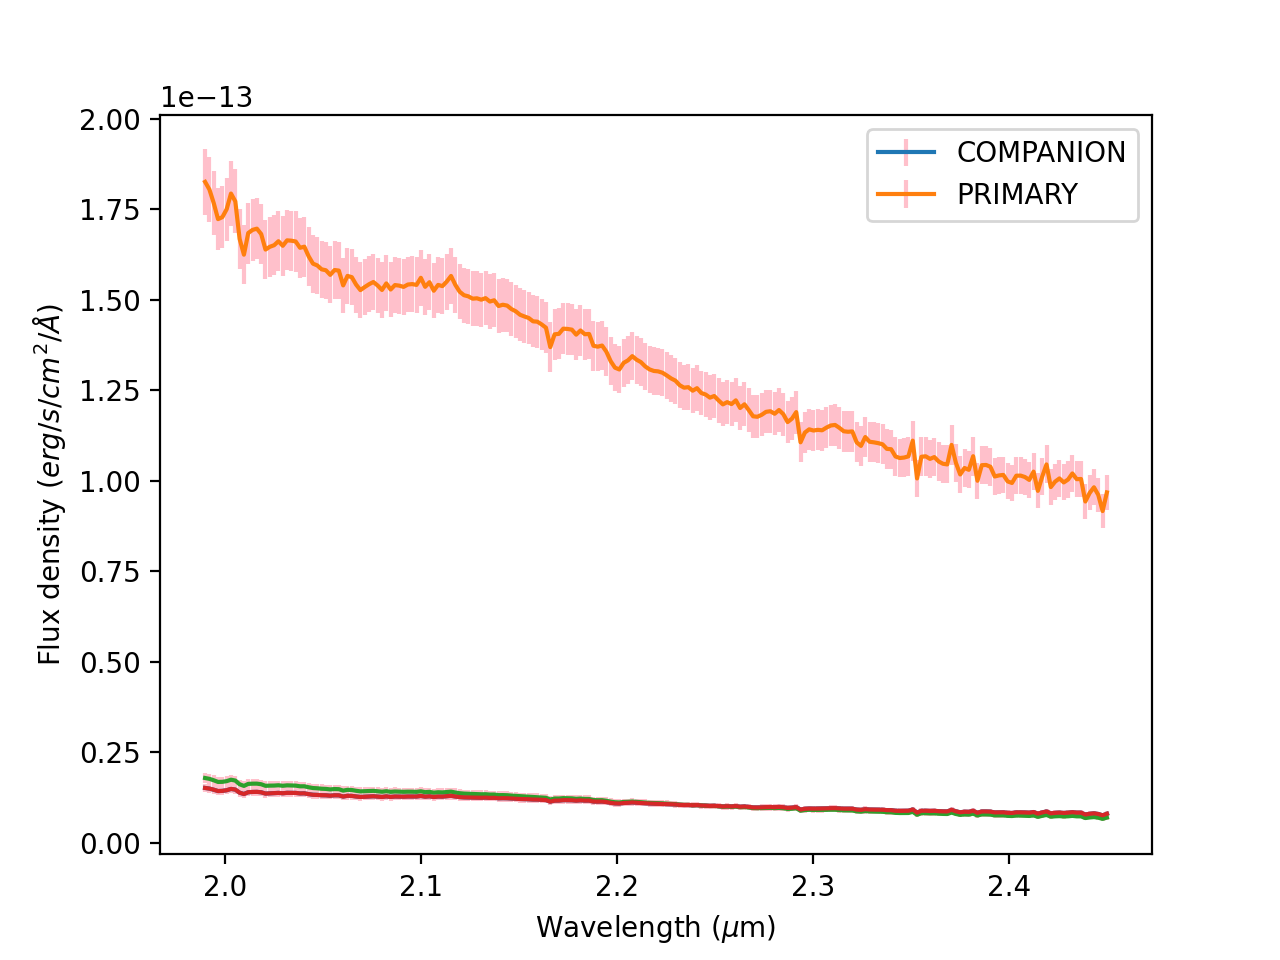

In [205]:
plt.figure()
#plt.plot(oi.spectra['flux WL'],FLUX,label='calib*template')
#plt.plot(oi.spectra['flux WL'],FLUX_primary,label='PRIMARY')
plt.errorbar(oi.spectra['flux WL'],FLUX_companion,FLUX_companion*0.05,label='COMPANION',ecolor='pink')
plt.errorbar(oi.spectra['flux WL'],FLUX_primary,FLUX_primary*0.05,label='PRIMARY',ecolor='pink')

plt.legend()
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel(r'Flux density ($erg/s/cm^{2}/\AA$)')

EFLUX_primary=FLUX_primary*0.08
EFLUX_secondary=FLUX_companion*0.08

In [206]:
FLUX_B189SW={'WVL':oi.spectra['flux WL'],'Flux_primary':FLUX_primary,'EFlux_primary':EFLUX_primary,'Flux_companion':FLUX_companion,'EFlux_companion':EFLUX_secondary}

In [207]:
np.save("B189SW_fluxes_2.npy", FLUX_B189SW)

In [215]:
file=np.load('B189SW_fluxes.npy',allow_pickle=True).item()
wvl=list(file['WVL'])
flux1=list(file['Flux_primary'])
eflux1=list(file['EFlux_primary'])
flux2=list(file['Flux_companion'])
eflux2=list(file['EFlux_companion'])

#print(flux2)

In [216]:
file2=np.load('B189SW_fluxes_2.npy',allow_pickle=True).item()
wvl2=list(file2['WVL'])
flux1_2=list(file2['Flux_primary'])
eflux1_2=list(file2['EFlux_primary'])
flux2_2=list(file2['Flux_companion'])
eflux2_2=list(file2['EFlux_companion'])

#print(flux2_2)

<IPython.core.display.Javascript object>


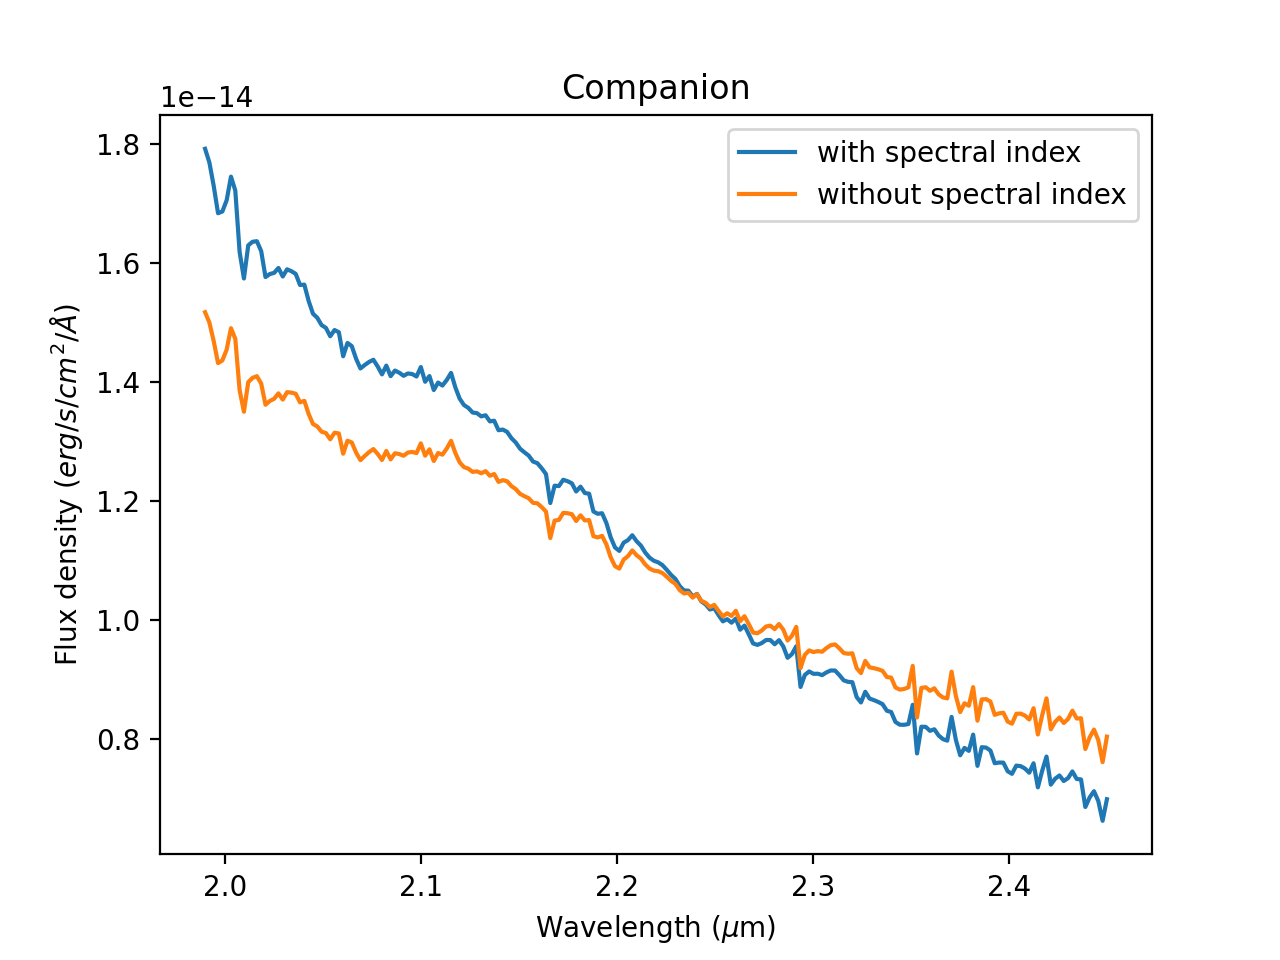

Text(0.5, 1.0, 'Companion')

In [223]:
plt.figure()
plt.plot(wvl,flux2,label='with spectral index')#,ecolor='pink')
plt.plot(wvl2,flux2_2,label='without spectral index')#,ecolor='pink')
plt.legend()
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel(r'Flux density ($erg/s/cm^{2}/\AA$)')
plt.title('Companion')

<IPython.core.display.Javascript object>


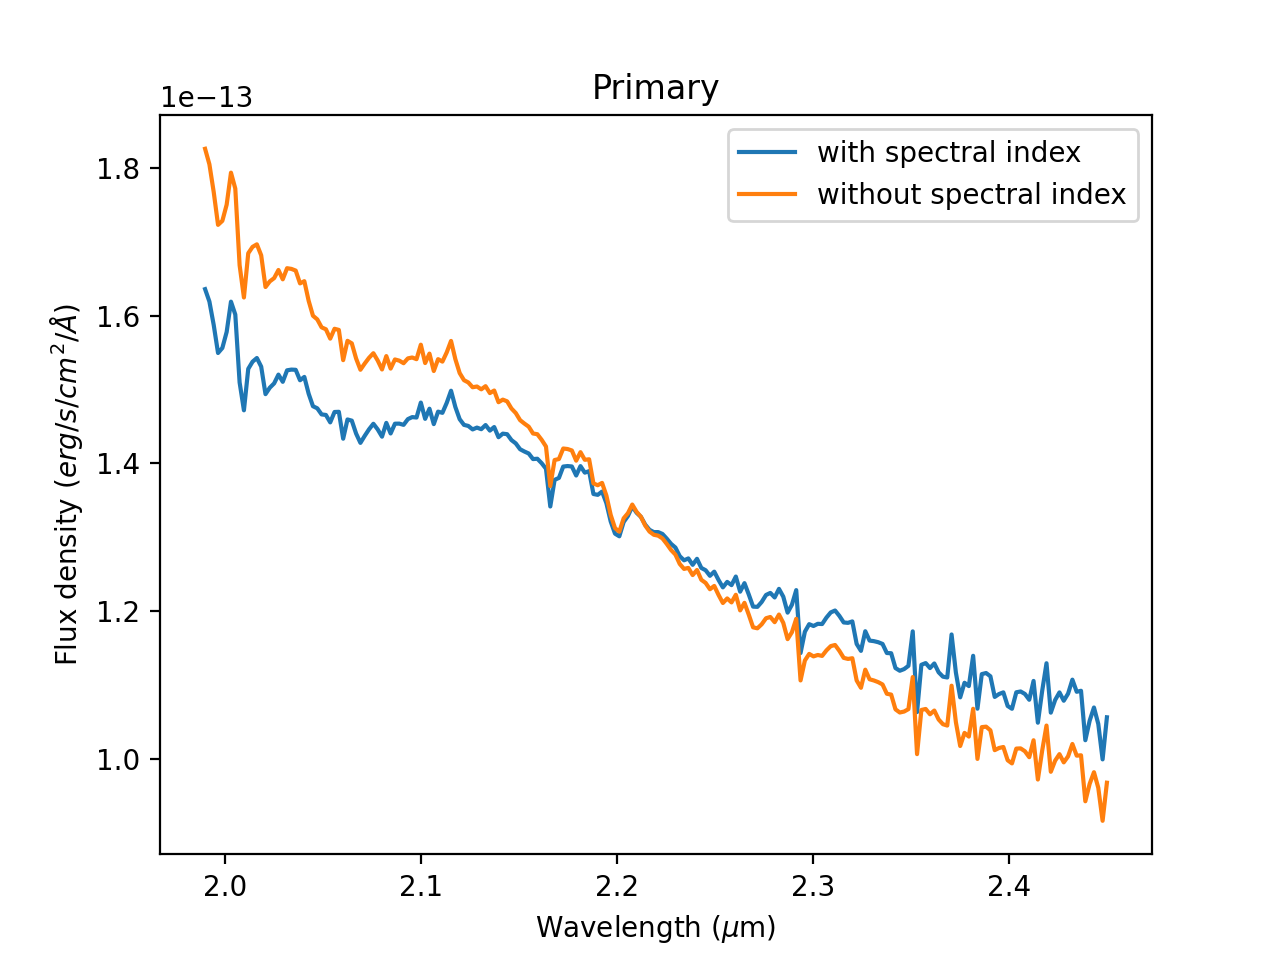

Text(0.5, 1.0, 'Primary')

In [224]:
plt.figure()
plt.plot(wvl,flux1,label='with spectral index')#,ecolor='pink')
plt.plot(wvl2,flux1_2,label='without spectral index')#,ecolor='pink')
plt.legend()
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel(r'Flux density ($erg/s/cm^{2}/\AA$)')
plt.title('Primary')